In this project i have used Kenya's government expenditure data sourced from WDI and statistical abstracts from KNBS.
The variables in the data set include: Population growth, Inflation, FDI, NetExports, Sectoral Government Expenditure and GDP growth rate.

The problem is a) to find for the effect of this factors(variables) on economic growth. 
               b)predicting our selected dependent variables based on the selected independent variables 

In [23]:
#importing libraries
import pandas as pd
import numpy as np


In [24]:
df= pd.read_csv("govtexpenditure.csv")
df 

,YEAR,POPULATION_GROWTH,INFLATION,FDI,NET_EXPORTS,SECTORAL_GOVT_EXPENDITURE,GDP GROWTH RATE
0,2000,2.740,9.980,0.8730,NaN,83021.5,0.599
1,2001,2.731,5.739,0.0410,25.0670,89087.3,3.779
2,2002,2.724,1.961,0.2100,38.8310,104656.5,0.546
3,2003,2.722,9.815,0.5480,37.8860,126283.5,2.932
4,2004,2.728,11.624,0.2860,27.9890,124808.7,5.104
5,2005,2.737,10.312,0.1130,31.1400,143159.8,5.907
6,2006,2.746,14.453,0.1960,12.2310,202943.2,6.472
7,2007,2.752,9.759,2.2810,17.8130,211870.2,6.851
8,2008,2.751,26.239,0.2660,1.5030,247892.5,0.232
9,2009,2.743,9.234,0.3140,2.8710,332763.6,3.307


In [82]:
#now lets perform a data exploration before cleaning
df.shape

(18, 7)

In [20]:
df.dtypes

YEAR                           int64
 POPULATION_GROWTH           float64
INFLATION                    float64
FDI                          float64
NET_EXPORTS                  float64
SECTORAL_GOVT_EXPENDITURE    float64
GDP GROWTH RATE              float64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YEAR                       18 non-null     int64  
 1    POPULATION_GROWTH         18 non-null     float64
 2   INFLATION                  18 non-null     float64
 3   FDI                        18 non-null     float64
 4   NET_EXPORTS                17 non-null     float64
 5   SECTORAL_GOVT_EXPENDITURE  18 non-null     float64
 6   GDP GROWTH RATE            18 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.1 KB


In [22]:
df.describe()

,YEAR,POPULATION_GROWTH,INFLATION,FDI,NET_EXPORTS,SECTORAL_GOVT_EXPENDITURE,GDP GROWTH RATE
count,18.000000,18.000000,18.000000,18.000000,17.000000,18.000000,18.000000
mean,2008.500000,2.694000,9.442056,0.972483,10.446253,348092.150000,4.583333
std,5.338539,0.069282,5.283810,1.003145,20.507602,243685.798292,2.289024
min,2000.000000,2.523000,1.961000,0.041000,-35.955000,83021.500000,0.232000
25%,2004.250000,2.674250,6.368250,0.271000,1.629300,130502.575000,3.425000
50%,2008.500000,2.726000,9.306000,0.551500,12.231000,290328.050000,5.230500
75%,2012.750000,2.739250,10.229000,1.244000,25.811000,511891.275000,5.899750
max,2017.000000,2.752000,26.239000,3.457000,38.831000,835804.300000,8.405000


In [86]:
#checking for missing values across each column
df.isnull().sum()


YEAR                         0
 POPULATION GROWTH           0
INFLATION                    0
FDI                          0
NET EXPORTS                  1
SECTORAL GOVT EXPENDITURE    0
GDP GROWTH RATE              0
dtype: int64

In [23]:
#checking for any other missing values across the datset 
df.isnull().any()

YEAR                         False
 POPULATION_GROWTH           False
INFLATION                    False
FDI                          False
NET_EXPORTS                   True
SECTORAL_GOVT_EXPENDITURE    False
GDP GROWTH RATE              False
dtype: bool

We can see that "NET EXPORTS' has a missing value 
lets correct that!

In [25]:
df=df.dropna()
df 

,YEAR,POPULATION_GROWTH,INFLATION,FDI,NET_EXPORTS,SECTORAL_GOVT_EXPENDITURE,GDP GROWTH RATE
1,2001,2.731,5.739,0.0410,25.0670,89087.3,3.779
2,2002,2.724,1.961,0.2100,38.8310,104656.5,0.546
3,2003,2.722,9.815,0.5480,37.8860,126283.5,2.932
4,2004,2.728,11.624,0.2860,27.9890,124808.7,5.104
5,2005,2.737,10.312,0.1130,31.1400,143159.8,5.907
6,2006,2.746,14.453,0.1960,12.2310,202943.2,6.472
7,2007,2.752,9.759,2.2810,17.8130,211870.2,6.851
8,2008,2.751,26.239,0.2660,1.5030,247892.5,0.232
9,2009,2.743,9.234,0.3140,2.8710,332763.6,3.307
10,2010,2.728,3.961,0.4450,2.9550,365365.9,8.405


the row with a missing value has been dropped 
now we move to analysis where i'll perform  relationship analyses and their visualizations 

In [18]:
#ANALYZING THE DATA FRAME


In [26]:
#finding for the year when "INFLATION" was at its highest and GDP growth rate was at its lowest 
df.groupby("INFLATION").max()

,YEAR,POPULATION_GROWTH,FDI,NET_EXPORTS,SECTORAL_GOVT_EXPENDITURE,GDP GROWTH RATE
INFLATION,,,,,,
1.961,2002,2.724,0.2100,38.8310,104656.5,0.546
3.961,2010,2.728,0.4450,2.9550,365365.9,8.405
5.718,2013,2.668,2.0307,-11.1610,530488.4,5.878
5.739,2001,2.731,0.0410,25.0670,89087.3,3.779
6.297,2016,2.560,0.5550,25.8110,756903.8,5.869
6.582,2015,2.599,0.9680,16.4470,575583.4,5.718
6.878,2014,2.636,1.3360,2.7540,692316.4,5.357
8.005,2017,2.523,0.8470,1.6293,835804.3,4.873
9.234,2009,2.743,0.3140,2.8710,332763.6,3.307


we can see that inflation was highest in 2008!

In [90]:
df1.groupby("GDP GROWTH RATE").max()

,YEAR,POPULATION GROWTH,INFLATION,FDI,NET EXPORTS,SECTORAL GOVT EXPENDITURE
GDP GROWTH RATE,,,,,,
0.232,2008,2.751,26.239,0.2660,1.5030,247892.5
0.546,2002,2.724,1.961,0.2100,38.8310,104656.5
2.932,2003,2.722,9.815,0.5480,37.8860,126283.5
3.307,2009,2.743,9.234,0.3140,2.8710,332763.6
3.779,2001,2.731,5.739,0.0410,25.0670,89087.3
4.563,2012,2.693,9.378,2.7380,-20.2250,456099.9
4.873,2017,2.523,8.005,0.8470,1.6293,835804.3
5.104,2004,2.728,11.624,0.2860,27.9890,124808.7
5.357,2014,2.636,6.878,1.3360,2.7540,692316.4


GDP GROWTH RATE was highest in 2010!

RELATIONSHIP ANALYSIS

In [43]:
#CORRELATION MATRIX

In [27]:
correlation=df.corr()
correlation

,YEAR,POPULATION_GROWTH,INFLATION,FDI,NET_EXPORTS,SECTORAL_GOVT_EXPENDITURE,GDP GROWTH RATE
YEAR,1.000000,-0.799617,-0.095477,0.412610,-0.546858,0.964975,0.377603
POPULATION_GROWTH,-0.799617,1.000000,0.335979,-0.098305,0.093475,-0.895908,-0.185743
INFLATION,-0.095477,0.335979,1.000000,0.025953,-0.257181,-0.215297,-0.303199
FDI,0.412610,-0.098305,0.025953,1.000000,-0.747858,0.306813,0.319632
NET_EXPORTS,-0.546858,0.093475,-0.257181,-0.747858,1.000000,-0.424375,-0.251178
SECTORAL_GOVT_EXPENDITURE,0.964975,-0.895908,-0.215297,0.306813,-0.424375,1.000000,0.307807
GDP GROWTH RATE,0.377603,-0.185743,-0.303199,0.319632,-0.251178,0.307807,1.000000


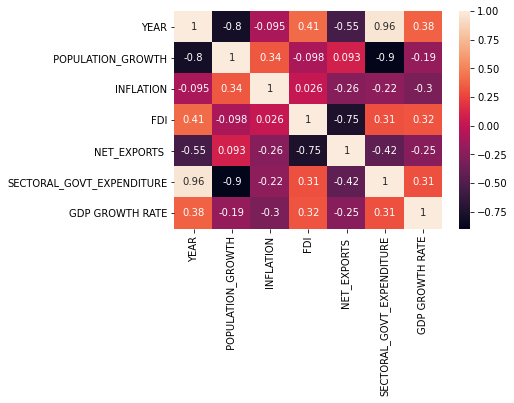

In [28]:
import seaborn as sns
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

negative coefficients indicate a negative relationship between the associated coefficients, where one variable tends to decrease with the increase of another,
while positive coefficients indicate a positive relationship between the coefficients, where one variable tends to increase with the increase of another 

In [106]:
#To show the relationship between the 2 variables more specifically i've used pairplot 
#the distribution in the plots also indicates the relationship between the 2 variables 

,YEAR,POPULATION_GROWTH,INFLATION,FDI,NET_EXPORTS,SECTORAL_GOVT_EXPENDITURE,GDP GROWTH RATE
1,2001,2.731,5.739,0.0410,25.0670,89087.3,3.779
2,2002,2.724,1.961,0.2100,38.8310,104656.5,0.546
3,2003,2.722,9.815,0.5480,37.8860,126283.5,2.932
4,2004,2.728,11.624,0.2860,27.9890,124808.7,5.104
5,2005,2.737,10.312,0.1130,31.1400,143159.8,5.907
6,2006,2.746,14.453,0.1960,12.2310,202943.2,6.472
7,2007,2.752,9.759,2.2810,17.8130,211870.2,6.851
8,2008,2.751,26.239,0.2660,1.5030,247892.5,0.232
9,2009,2.743,9.234,0.3140,2.8710,332763.6,3.307
10,2010,2.728,3.961,0.4450,2.9550,365365.9,8.405


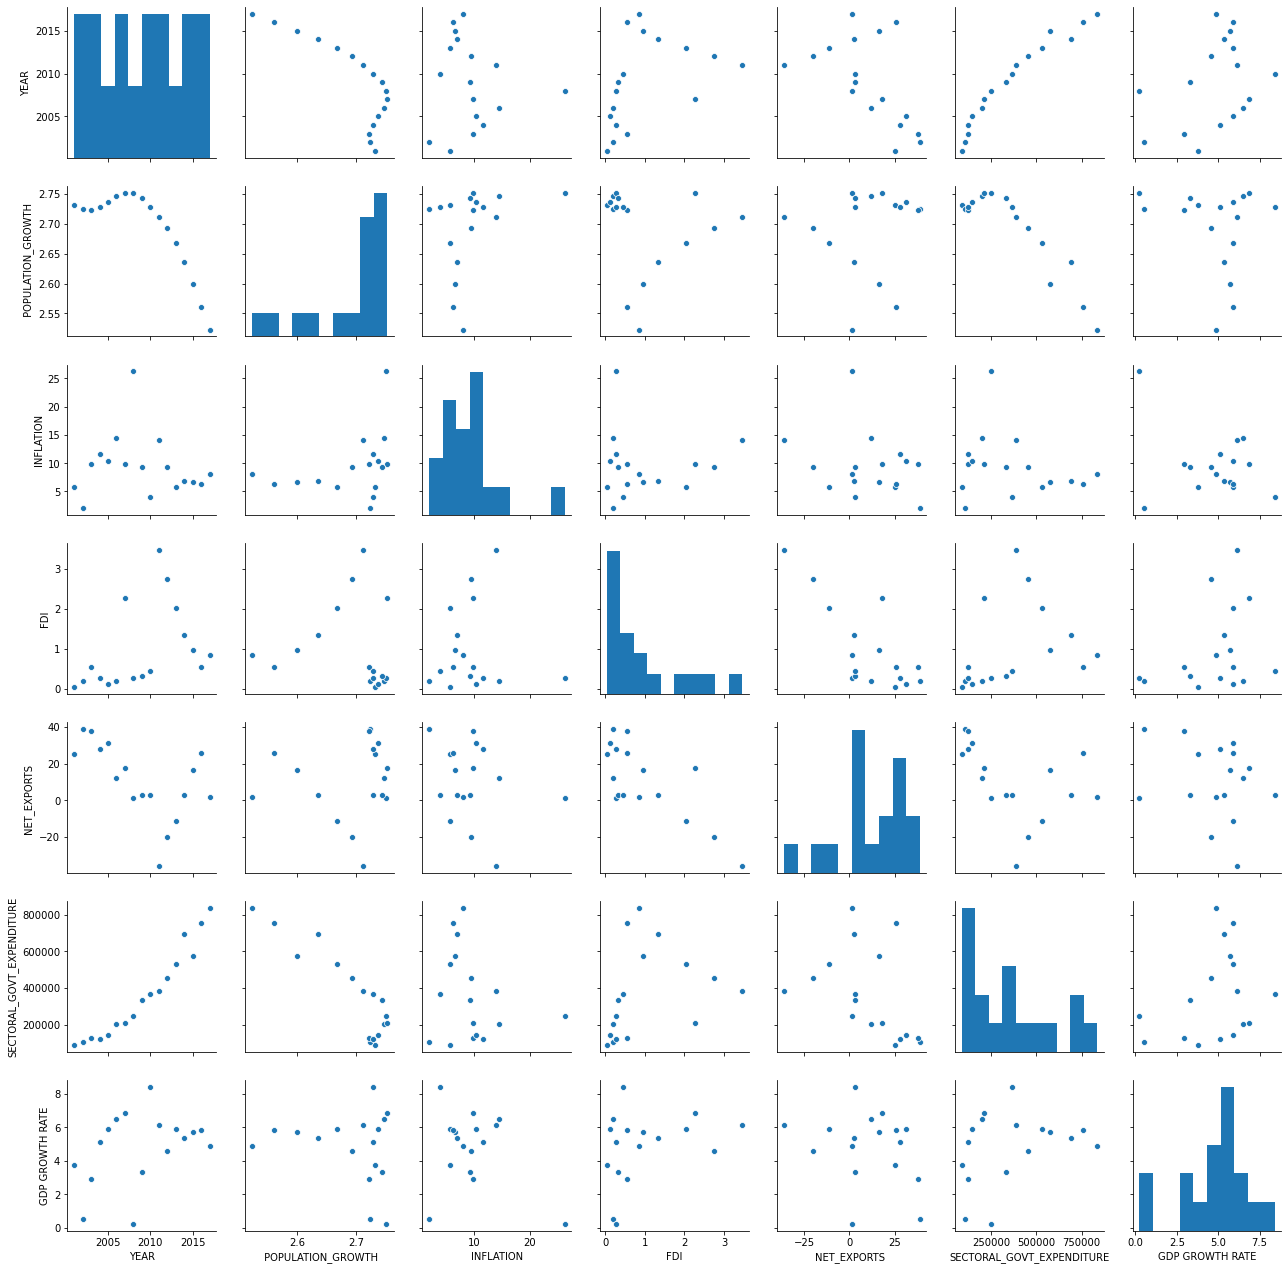

In [29]:
sns.pairplot(df)
df

there's a more steady positive linear relationship between sectoral government expenditure and year, 
sectoral government expenditure has continued to increase over the years 

there's also a more negative linear relationship between sectoral_govt_expenditure and population_growth(this could be attributed to the fact that as population increases more smaller sectors have to be created to reach the population more effectively. total amount of government spending is therefore being divided among more sectors, decreasing the amount to each sector. )

ONTO SOLVING PART B) OF OUR PROBLEM! 
          WE WANT TO PREDICT GDP GROWTH RATE based on THE REST OF THE VARIABLES


In [29]:
#FOR X WE SPECIFY

X=df.iloc[:,:-1]
# This means we have selected all the rows and columns except the last one 

In [30]:
print(X)

    YEAR   POPULATION_GROWTH  INFLATION     FDI  NET_EXPORTS   \
1   2001               2.731      5.739  0.0410       25.0670   
2   2002               2.724      1.961  0.2100       38.8310   
3   2003               2.722      9.815  0.5480       37.8860   
4   2004               2.728     11.624  0.2860       27.9890   
5   2005               2.737     10.312  0.1130       31.1400   
6   2006               2.746     14.453  0.1960       12.2310   
7   2007               2.752      9.759  2.2810       17.8130   
8   2008               2.751     26.239  0.2660        1.5030   
9   2009               2.743      9.234  0.3140        2.8710   
10  2010               2.728      3.961  0.4450        2.9550   
11  2011               2.711     14.022  3.4570      -35.9550   
12  2012               2.693      9.378  2.7380      -20.2250   
13  2013               2.668      5.718  2.0307      -11.1610   
14  2014               2.636      6.878  1.3360        2.7540   
15  2015               2.

In [26]:
#FOR Y WE SPECIFY 
Y=df.iloc[:,6].values


In [27]:
print(Y)

[3.779 0.546 2.932 5.104 5.907 6.472 6.851 0.232 3.307 8.405 6.108 4.563
 5.878 5.357 5.718 5.869 4.873]


In [61]:
#SPLITTING DATA INTO TRAINING AND TESTING SET

In [31]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2,random_state=0) 

In [32]:
# TRAINING THE MODEL 
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [33]:
regressor.coef_

array([ 5.65719472e-01,  8.56379076e+00, -3.01631608e-01, -6.03325114e-01,
       -2.55537818e-02, -9.34061227e-06])

In [114]:
#PREDICTING THE MODEL
#y_pred=regressor.predict(x_test)
#y_pred

array([5.92813982, 4.93056151, 6.58262967, 8.22468819])

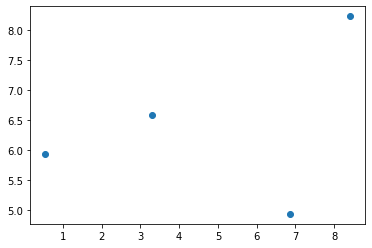

In [121]:
pred=regressor.predict(x_test)
plt.scatter(y_test,pred)


The line would have a huge outlier we therefore proceed to evaluating the model using errors to check if the model would be considered good

In [122]:
#EVALUATING THE MODEL 
#calculating errors
from sklearn import metrics 
print('mean absolute error:', metrics.mean_absolute_error(y_test,pred))
print('mean squared error:',metrics.mean_squared_error(y_test,pred))
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test,pred)))


mean absolute error: 2.689629944007601
mean squared error: 10.854443764862298
root mean squared error: 3.2946082870141478


CONCLUSIONS 
i have calculated the above errors which are common measures used to assess model performance.
Our mean absolute error and root mean squared error are relatively high.
usually a root mean squared between(0.2-0.5) and a mean absolute error close to zero would indicate a great model performance. 
in our case one would consider applying other models

In [34]:
coefficients=pd.DataFrame(regressor.coef_ ,X.columns)
coefficients.columns=['coefficient']
coefficients


,coefficient
YEAR,0.565719
POPULATION_GROWTH,8.563791
INFLATION,-0.301632
FDI,-0.603325
NET_EXPORTS,-0.025554
SECTORAL_GOVT_EXPENDITURE,-0.000009


we can still make conclusions from our model. 
POPULATION GROWTH seems to be a much more significant factor here with a high positive coefficient.
there could be two choices here;  1) focus more on that sector and other factors that may relate to it such as improved human resource among others as it plays a major contribution in GDP growth
2) improving on the other sectors 